In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import textwrap
import numpy as np

In [3]:
plt.rc('font', family='Georgia')
proj_list = [
    'activiti_dot',
    'fastjson_dot',
    'commons-exec_dot',
    'httpcore_dot',
    'incubator-dubbo_dubbo-remoting.dubbo-remoting-netty',
    'incubator-dubbo_dubbo-rpc.dubbo-rpc-dubbo',
    'rxjava2-extras_dot',
    # 'hutool_hutool-cron',
    'elastic-job-lite_dot',
    'elastic-job-lite_elastic-job-lite-core',
    # 'esper_examples.rfidassetzone',
    # 'yawp_yawp-testing.yawp-testing-appengine',
    'luwak_luwak',
    'fluent-logger-java_dot',
    'delight-nashorn-sandbox_dot',
    'handlebars.java_dot',
    'assertj-core_dot',
    'db-scheduler_dot',
    'http-request_dot',
    'timely_server',
    'ninja_dot',
    'orbit_dot',
    'logback_dot',
    # 'noxy_noxy-discovery-zookeeper',
    'spring-boot_dot',
    'retrofit_retrofit',
    'retrofit_retrofit-adapters.rxjava',
    'wro4j_wro4j-extensions',
    # 'carbon-apimgt_analyzer-modules.org.wso2.carbon.apimgt.throttling.siddhi.extension',
    'zxing_dot']
fr0_proj_list = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 15, 20, 21, 22, 23]
a_list = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
proj_num = len(proj_list)
mach_seq_type_num = 7
beta = 25.993775 / 3600

In [3]:
def get_baseline(path,
                 proj,
                 mach_num):
    df = pd.read_csv(f'{path}/{proj}.csv')
    df = df.loc[df['machines_num'] == mach_num]
    github = df.loc[df['conf'] == '27CPU2Mem8GB.sh']
    github.index = [0]
    github = github.iloc[0, :]
    df_sorted = df.sort_values(by=['fitness', 'time_parallel'])
    smart = df_sorted.iloc[0, :]
    return github, smart


def get_best(path,
             proj):
    df = pd.read_csv(f'{path}/{proj}.csv')
    df_sorted = df.sort_values(by='fitness')
    return df_sorted.index[0]

[25, 4, 25, 3]
[0, 0]
[0.9222736214756365, 0.9988399375700826, 0.5589367125402945, 0.9727636467815789]
[[0.9021158955706458, 0.9043358138319103, 0.9969276105977694, 0.9105240412375145, 0.9988709296817897, 0.9999425316917491, 0.8927977938277599, 0.7819023988083632, 0.9819305034926896, 0.9367608992440822, 0.9999150879659964, 0.9340210029585537, 0.9219755410839716, 0.8522298618634216, 0.9742056131932182, 0.9184251826259757, 0.8446886309430495, 0.9121841098132505, 0.9942900915901365, 0.9436727273951803, 0.8709298298687558, 0.8840099945027438, 0.935510529973576, 0.7830647791569144, 0.9816091359718984], [0.6191277223014977, 0.7258182999320647, 0.1405602971411482, 0.5487138484011465, 0.08075118088630139, 0.07970221253726799, 0.3742718189080489, 0.4485582743199524, 0.4558047603820206, 0.6866181558780166, 0.24613514738961376, 0.8155295933446643, 0.8504529500184734, 0.8571053297963972, 0.40193176078568044, 0.8472479796908021, 0.8472264159235271, 0.7652094562177436, 0.30014909529659717, 0.1082495

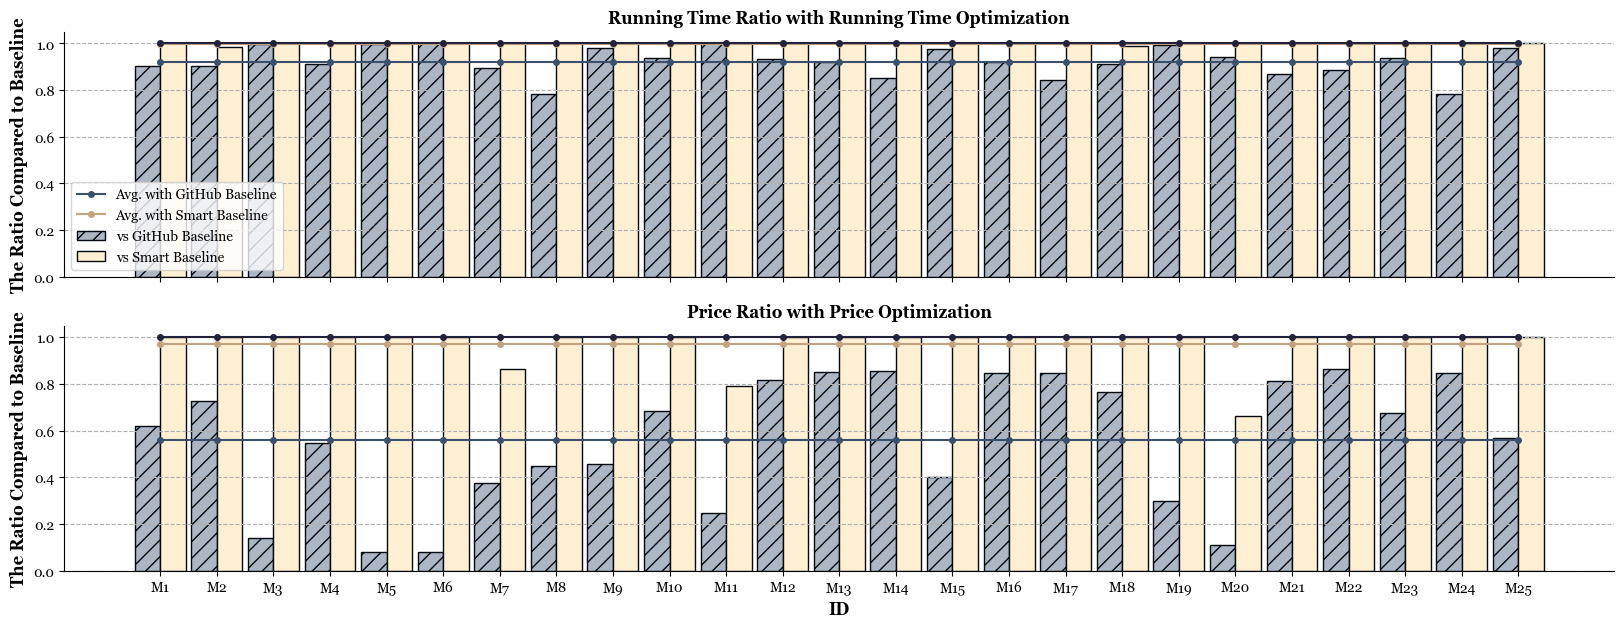

In [9]:
# RQ1: GA a=0, a=1 VS. GitHub, Smart
x = [f'M{i + 1}' for i in range(proj_num)]
# a=1: [time]; a=0: [price]
y_github = [[], []]
y_smart = [[], []]
homo_record = [[], []]
# y = [1.25, 1.0, 0.75, 0.5, 0.25, 0]
# y_label = [1.25, 1.0, 0.75, 0.5, 0.25, 0]
a0_path = 'rerun_data/ga_a0'
a1_path = 'rerun_data/ga_a1'
homo_df = pd.DataFrame(None, columns=['project', 'a0_or_a1', 'machines_num', 'conf'])

def sub_double_bar(ax,
                   x,
                   y_github,
                   y_smart,
                   title):
    bar_width = 0.45
    x = np.array(x)
    ax.bar(x-bar_width/2, y_github, color='#adb6c4', width=bar_width, edgecolor='#04080f', label='vs GitHub Baseline', hatch='//')
    ax.plot(x, np.array([np.mean(y_github) for _ in range(len(x))]), 'o-', color='#3a506b', markersize=4, label='Avg. with GitHub Baseline')
    ax.bar(x+bar_width/2, y_smart, color='#ffefd3', width=bar_width, edgecolor='#04080f', label='vs Smart Baseline')
    ax.plot(x, np.array([np.mean(y_smart) for _ in range(len(x))]), 'o-', color='#c4a381', markersize=4, label='Avg. with Smart Baseline')
    ax.plot(x, np.array([1 for _ in range(len(x))]), 'o-', color='#22223b', markersize=4)
    ax.yaxis.grid(True, linestyle='--', zorder=0)
    ax.set_title(title, size=12, weight='bold')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')


for proj in proj_list:
    a0_df = pd.read_csv(f'{a0_path}/{proj}.csv')
    a1_df = pd.read_csv(f'{a1_path}/{proj}.csv')
    a0_idx = get_best(a0_path,
                       proj)
    a1_idx = get_best(a1_path,
                       proj)
    a0_mach_num = a0_df.loc[a0_idx, 'machines_num']
    a1_mach_num = a1_df.loc[a1_idx, 'machines_num']
    a0_github, a0_smart = get_baseline('baseline/non_ig/a0',
                                       proj,
                                       a0_mach_num)
    a1_github, a1_smart = get_baseline('baseline/non_ig/a1',
                                       proj,
                                       a1_mach_num)
    y_github[0].append(a1_df.loc[a1_idx, 'time_parallel']/a1_github['time_parallel'])
    y_github[1].append(a0_df.loc[a0_idx, 'price']/a0_github['price'])
    y_smart[0].append(a1_df.loc[a1_idx, 'time_parallel']/a1_smart['time_parallel'])
    y_smart[1].append(a0_df.loc[a0_idx, 'price']/a0_smart['price'])
    homo_record[0].append(a1_df.loc[a1_idx, 'confs_num'] == 1)
    homo_record[1].append(a0_df.loc[a0_idx, 'confs_num'] == 1)
    homo_df.loc[len(homo_df.index)] = [proj, 'a0', a0_mach_num, a0_smart['conf']]
    homo_df.loc[len(homo_df.index)] = [proj, 'a1', a1_mach_num, a1_smart['conf']]

# homo_df.to_csv(f'homo_smart_ig.csv', sep=',', header=True, index=False)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 7), sharex=True)
sub_double_bar(ax1,
               [i for i in range(len(x))],
               y_github[0],
               y_smart[0],
               'Running Time Ratio with Running Time Optimization')
sub_double_bar(ax2,
               [i for i in range(len(x))],
               y_github[1],
               y_smart[1],
                'Price Ratio with Price Optimization')
ax1.set_ylabel('The Ratio Compared to Baseline', size=12, weight='bold')
ax2.set_ylabel('The Ratio Compared to Baseline', size=12, weight='bold')
ax1.set_xticks([i for i in range(len(x))])
ax2.set_xticks([i for i in range(len(x))])
ax1.set_xticklabels(x)
ax2.set_xticklabels(x)
ax2.set_xlabel(r'ID', size=12, weight='bold')
ax1.legend()
plt.savefig('RQ1_nonig.pdf', bbox_inches='tight', dpi=1000)

# time: github, smart; price: github, smart
better_arr = [0, 0, 0, 0]
homo_arr = [0, 0]
for i in range(proj_num):
    if y_github[0][i] < 1.0:
        better_arr[0] += 1
    if y_smart[0][i] < 1.0:
        better_arr[1] += 1
    if (y_github[0][i] == 1.0 or y_smart[0][i] == 1.0) and homo_record[0][i] is True:
        homo_arr[0] += 1
    if y_github[1][i] < 1.0:
        better_arr[2] += 1
    if y_smart[1][i] < 1.0:
        better_arr[3] += 1
    if (y_github[1][i] == 1.0 or y_smart[1][i] == 1.0) and homo_record[1][i] is True:
        homo_arr[1] += 1
print(better_arr)
print(homo_arr)
print([np.mean(y_github[0]), np.mean(y_smart[0]), np.mean(y_github[1]), np.mean(y_smart[1])])

print(y_github)
print(y_smart)

# alpha=0.5, x-module, y-trade-off
alpha_path = 'rerun_data/ga_a0.5_ig'
y = [[], []]
y_sep = [[], [], [], []]
for proj in proj_list:
    df = pd.read_csv(f'{alpha_path}/{proj}.csv')
    idx = get_best(alpha_path,
                   proj)
    github, smart = get_baseline('baseline/ig/a0.5',
                                 proj,
                                 df.loc[idx, 'machines_num'])
    y_sep[0].append(df.loc[idx, 'time_parallel']/github['time_parallel'])
    y_sep[1].append(df.loc[idx, 'time_parallel']/smart['time_parallel'])
    y_sep[2].append(df.loc[idx, 'price']/github['price'])
    y_sep[3].append(df.loc[idx, 'price']/smart['price'])
    y[0].append((df.loc[idx, 'time_parallel']/github['time_parallel'])*(df.loc[idx, 'price']/github['price']))
    y[1].append((df.loc[idx, 'time_parallel']/smart['time_parallel'])*(df.loc[idx, 'price']/smart['price']))

# fig, ax = plt.subplots(figsize=(20, 3.5))
# sub_double_bar(ax,
#                [i for i in range(len(x))],
#                y[0],
#                y[1],
#                '')
# ax.set_xticks([i for i in range(len(x))])
# ax.set_xticklabels(x)
# ax.set_xlabel(r'ID', size=12, weight='bold')
# ax.set_ylabel('Trade-off', size=12, weight='bold')
# plt.savefig('RQ1_a0.5.pdf', bbox_inches='tight', dpi=1000)

# print([np.mean(y[0]), np.mean(y[1])])

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 7), sharex=True)
# sub_double_bar(ax1,
#                [i for i in range(len(x))],
#                y_sep[0],
#                y_sep[1],
#                'Running Time Ratio')
# sub_double_bar(ax2,
#                [i for i in range(len(x))],
#                y_sep[2],
#                y_sep[3],
#                 'Price Ratio')
# ax1.set_ylabel('The Ratio Compared to Baseline', size=12, weight='bold')
# ax2.set_ylabel('The Ratio Compared to Baseline', size=12, weight='bold')
# ax1.set_xticks([i for i in range(len(x))])
# ax2.set_xticks([i for i in range(len(x))])
# ax1.set_xticklabels(x)
# ax2.set_xticklabels(x)
# ax2.set_xlabel(r'ID', size=12, weight='bold')
# ax1.legend()
# plt.savefig('RQ1_a0.5_sep.pdf', bbox_inches='tight', dpi=1000)

# print([np.mean(y_sep[i]) for i in [0, 1, 2, 3]])

[1.1148892699725512, -0.49319947782111084, 0.5521505504290332] [0.9855025645799389, -0.8031146132575496, 0.7928025344775522]


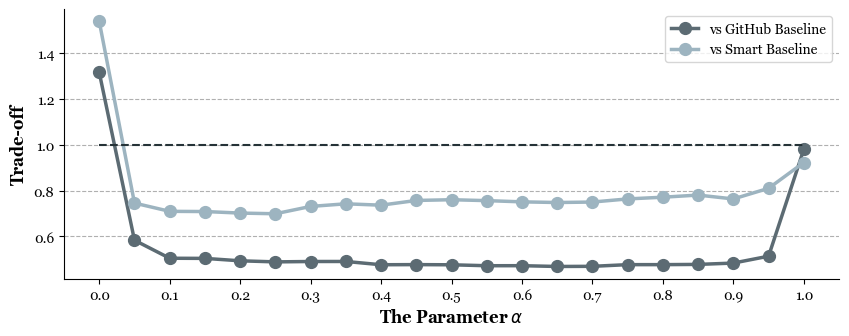

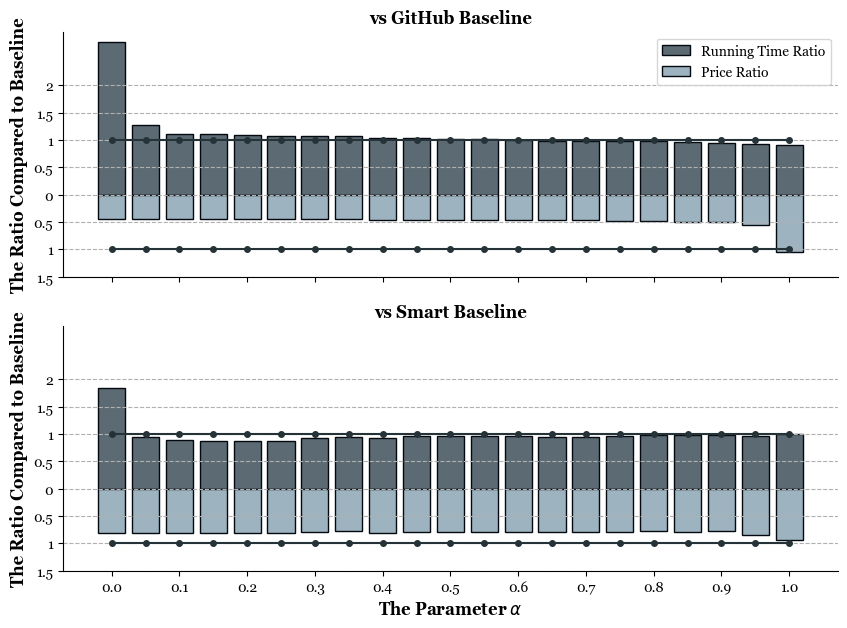

In [10]:
# RQ2:
def sub_double_bar(ax,
                   x,
                   y_up,
                   y_down,
                   title,
                   up_color='#5c6b73',
                   down_color='#9db4c0',
                   hor_color='#253237',
                   bar_width=0.04):
    ax.yaxis.grid(True, linestyle='--', zorder=0)
    ax.bar(x, y_up, color=up_color, width=bar_width, edgecolor='#04080f', label='Running Time Ratio')
    ax.bar(x, y_down, color=down_color, width=bar_width, edgecolor='#04080f', label='Price Ratio')
    ax.plot(x, np.array([1 for _ in range(len(x))]), 'o-', color=hor_color, markersize=4)
    ax.plot(x, np.array([-1 for _ in range(len(x))]), 'o-', color=hor_color, markersize=4)
    ax.set_title(title, size=12, weight='bold')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

x = a_list
# [runtime], [price], [ratio]
y_github = [[], [], []]
y_smart = [[], [], []]
for a in a_list:
    path = f'rerun_data/ga_a{a}_ig'
    a_github = [[], [], []]
    a_smart = [[], [], []]
    for i, proj in enumerate(proj_list):
        df = pd.read_csv(f'{path}/{proj}.csv')
        idx = get_best(path,
                       proj)
        best_tm = df.loc[idx, 'time_parallel']
        best_pr = df.loc[idx, 'price']
        mach_num = df.loc[idx, 'machines_num']
        github, smart = get_baseline(f'baseline/ig/a{a}',
                                     proj,
                                     mach_num)
        a_github[0].append(best_tm / github['time_parallel'])
        a_github[1].append(-best_pr / github['price'])
        a_github[2].append(a_github[0][i] * -a_github[1][i])
        a_smart[0].append(best_tm / smart['time_parallel'])
        a_smart[1].append(-best_pr / smart['price'])
        a_smart[2].append(a_smart[0][i] * -a_smart[1][i])
    y_github[0].append(np.mean(a_github[0]))
    y_github[1].append(np.mean(a_github[1]))
    y_github[2].append(np.mean(a_github[2]))
    y_smart[0].append(np.mean(a_smart[0]))
    y_smart[1].append(np.mean(a_smart[1]))
    y_smart[2].append(np.mean(a_smart[2]))
# -------------------------------------- Trade-off Graph --------------------------------------
_, ax = plt.subplots(figsize=(10, 3.5))
ax.plot(x, y_github[2], 'o-', label='vs GitHub Baseline', color='#5c6b73', linewidth=2.5, markersize=8.5)
ax.plot(x, y_smart[2], 'o-', label='vs Smart Baseline', color='#9db4c0', linewidth=2.5, markersize=8.5)
ax.plot(x, [1 for _ in range(len(x))], '--', color='#253237', markersize=4)
ax.set_xlabel(r'The Parameter $\alpha$', size=12, weight='bold')
ax.set_ylabel(r'Trade-off', size=12, weight='bold')
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(True, linestyle='--', zorder=0)
ax.legend()

plt.savefig('RQ2_line.pdf', bbox_inches='tight')
# -------------------------------------- Bi-Bar Graph --------------------------------------
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharey=True, sharex=True)
sub_double_bar(ax1,
               x,
               y_github[0],
               y_github[1],
               'vs GitHub Baseline')
sub_double_bar(ax2,
               x,
               y_smart[0],
               y_smart[1],
               'vs Smart Baseline')
ax1.set_ylabel('The Ratio Compared to Baseline', size=12, weight='bold')
ax2.set_ylabel('The Ratio Compared to Baseline', size=12, weight='bold')
ax1.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax2.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax1.set_yticks([2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5])
ax1.set_yticklabels([2, 1.5, 1, 0.5, 0, 0.5, 1, 1.5])
ax2.set_yticks([2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5])
ax2.set_yticklabels([2, 1.5, 1, 0.5, 0, 0.5, 1, 1.5])
ax2.set_xlabel(r'The Parameter $\alpha$', size=12, weight='bold')
ax1.legend()
plt.savefig('RQ2_bar.pdf', bbox_inches='tight', dpi=1000)
print([np.mean(y_github[i]) for i in [0, 1, 2]], [np.mean(y_smart[i]) for i in [0, 1, 2]])

[0.4138930364656307, 0.0, 0.03, 0.041023738938272, 0.0034482758620689, 0.0967249006674371, 0.0066555555555555, 0.0, 0.0033333333333332, 0.0297339259259258, 0.0033333333333332, 0.0099777777777777, 0.0344827586206896, 0.096551724137931, 0.2954920566828551, 0.01, 0.0361696600000001, 0.9902, 0.1566666666666666, 0.1156178673929135, 0.0033333333333332, 0.0, 0.0, 0.0, 0.097526753864447]
0.0989665879423268
[0.3077538731760944, 0.0, 0.0016666666666667, 0.0576990286906891, 0.0, 0.0034482758620689, 0.0099777777777777, 0.0, 0.0, 0.0, 0.0, 0.0033333333333332, 0.0103448275862069, 0.0758620689655172, 0.0554031423999999, 0.0, 0.0264011832098767, 0.9903666666666666, 0.0825794074074074, 0.0199444444444444, 0.0, 0.0033333333333332, 0.0, 0.0033333333333332, 0.0611177170035671]
0.0685026031942793
[0.3642859859732311, 0.01, 0.03, 0.0806152666891889, 0.0034482758620689, 0.1555195948979234, 0.0033333333333332, 0.0, 0.0, 0.0, 0.0, 0.0066666666666667, 0.0068965517241379, 0.0999999999999999, 0.1751629383073951, 

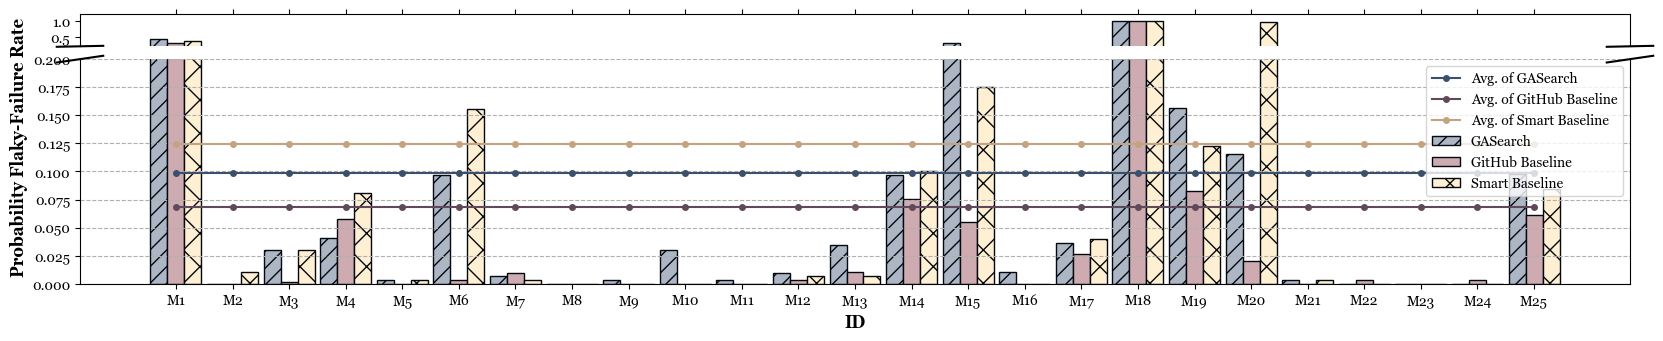

In [11]:
# RQ3: Failrate bar graph
x = [f'M{i + 1}' for i in range(proj_num)]
a = 0.5
y_ga = []
y_github = []
y_smart = []
path = f'rerun_data/ga_a{a}_ig'
for proj in proj_list:
    df = pd.read_csv(f'{path}/{proj}.csv')
    idx = get_best(path,
                   proj)
    y_ga.append(df.loc[idx, 'probability_failure_rate'])
    github, smart = get_baseline(f'baseline/ig/a{a}',
                                 proj,
                                 df.loc[idx, 'machines_num'])
    y_github.append(github['probability_failure_rate'])
    y_smart.append(smart['probability_failure_rate'])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 3.5), gridspec_kw={'height_ratios': [1, 7], 'hspace': 0.1})
bar_width = 0.3
x_num = np.array([i for i in range(len(x))])
ax1.bar(x_num - bar_width, y_ga, color='#adb6c4', width=bar_width, edgecolor='#04080f', label='GASearch', hatch='//')
ax2.bar(x_num - bar_width, y_ga, color='#adb6c4', width=bar_width, edgecolor='#04080f', label='GASearch', hatch='//')
ax2.plot(x_num, [np.mean(y_ga) for _ in range(len(x))], 'o-', color='#3a506b', markersize=4, label='Avg. of GASearch')
ax1.bar(x_num, y_github, color='#ceabb1', width=bar_width, edgecolor='#04080f', label='GitHub Baseline')
ax2.bar(x_num, y_github, color='#ceabb1', width=bar_width, edgecolor='#04080f', label='GitHub Baseline')
ax2.plot(x_num, [np.mean(y_github) for _ in range(len(x))], 'o-', color='#60495a', markersize=4, label='Avg. of GitHub Baseline')
ax1.bar(x_num + bar_width, y_smart, color='#ffefd3', width=bar_width, edgecolor='#04080f', label='Smart Baseline', hatch='x')
ax2.bar(x_num + bar_width, y_smart, color='#ffefd3', width=bar_width, edgecolor='#04080f', label='Smart Baseline', hatch='x')
ax2.plot(x_num, [np.mean(y_smart) for _ in range(len(x))], 'o-', color='#c4a381', markersize=4, label='Avg. of Smart Baseline')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
fig.patch.set_visible(False)

ax1.set_ylim(0.2, 1.2)
ax2.set_ylim(0, 0.2)
ax2.set_xticks(x_num)
ax2.set_xticklabels(x)
ax2.set_xlabel(r'ID', size=12, weight='bold')
ax2.yaxis.grid(True, linestyle='--', zorder=0)
ax2.legend()
fig.text(0.09, 0.5, 'Probability Flaky-Failure Rate', va='center', rotation='vertical', fontsize=12, weight='bold')
# plt.savefig('RQ3.pdf', bbox_inches='tight', dpi=1000)

print(y_ga)
print(np.mean(y_ga))
print(y_github)
print(np.mean(y_github))
print(y_smart)
print(np.mean(y_smart))

10
[1.0, 1.664505404146963, 2.778240517188343, 1.1000460482310324, 1.040796024340109, 1.0, 1.001377161141128, 1.123291714221125, 1.0054225245462662, 1.0037437081409357, 1.0023721006852944, 0.9989861956095515, 1.0, 1.0, 1.0033940790190865]
[True, False, False, False, False, True, False, False, False, False, False, False, True, True, True]
1.1814783651513223


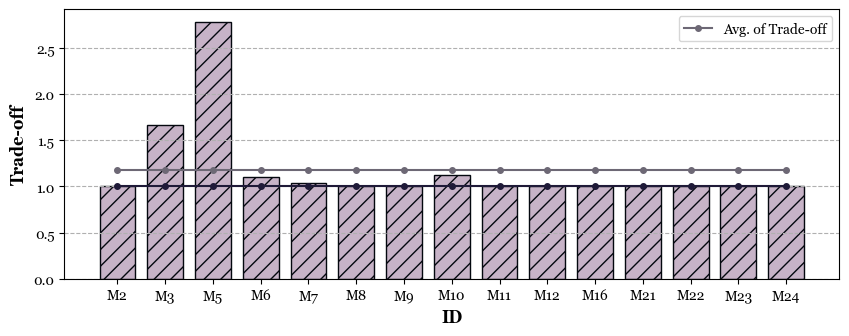

In [18]:
# RQ3: fr=0
x = [f'M{i + 1}' for i in fr0_proj_list]
a = 0.5
y_fr1 = []
y_fr0 = []
y_tradeoff = []
ga_pro_record = []
path = f'rerun_data/ga_a{a}_ig'

for idx in fr0_proj_list:
    proj = proj_list[idx]
    df_fr1 = pd.read_csv(f'{path}/{proj}.csv')
    df_fr0 = pd.read_csv(f'{path}_fr0/{proj}.csv')
    idx_fr1 = get_best(path,
                       proj)
    idx_fr0 = get_best(f'{path}_fr0',
                       proj)
    time_ratio = df_fr0.loc[idx_fr0, 'time_parallel']/df_fr1.loc[idx_fr1, 'time_parallel']
    price_ratio = df_fr0.loc[idx_fr0, 'price']/df_fr1.loc[idx_fr1, 'price']
    y_tradeoff.append(time_ratio*price_ratio)
    ga_pro_record.append(df_fr1.loc[idx_fr1, 'probability_failure_rate'] == 0)

# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 3.5), gridspec_kw={'height_ratios': [1, 5], 'hspace': 0.1})
fig, ax = plt.subplots(figsize=(10, 3.5))
bar_width = 0.75
x_num = np.array([i for i in range(len(x))])
ax.bar(x_num, y_tradeoff, color='#c7b3c7', width=bar_width, edgecolor='#04080f', hatch='//')
ax.plot(x_num, [np.mean(y_tradeoff) for _ in range(len(x))], 'o-', color='#6d6875', markersize=4, label='Avg. of Trade-off')
ax.plot(x_num, [1.0 for _ in range(len(x))], 'o-', color='#1f1a38', markersize=4)

# ax1.bar(x_num - bar_width/2, y_fr1, color='#adb6c4', width=bar_width, edgecolor='#04080f', label='GASearch', hatch='//')
# ax2.bar(x_num - bar_width/2, y_fr1, color='#adb6c4', width=bar_width, edgecolor='#04080f', label='GASearch', hatch='//')
# ax2.plot(x_num, [np.mean(y_fr1) for _ in range(len(x))], 'o-', color='#3a506b', markersize=4, label='Avg. of GASearch')
# ax1.bar(x_num + bar_width/2, y_fr0, color='#ffefd3', width=bar_width, edgecolor='#04080f', label='Flaky-Failure Rate = 0')
# ax2.bar(x_num + bar_width/2, y_fr0, color='#ffefd3', width=bar_width, edgecolor='#04080f', label='Flaky-Failure Rate = 0')
# ax2.plot(x_num, [np.mean(y_fr0) for _ in range(len(x))], 'o-', color='#c4a381', markersize=4, label='Avg. of Flaky-Failure Rate = 0')

# ax1.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=False)
# ax2.xaxis.tick_bottom()

# d = .015
# kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
# ax1.plot((-d, +d), (-d, +d), **kwargs)
# ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
# kwargs.update(transform=ax2.transAxes)
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
# fig.patch.set_visible(False)

# ax1.set_ylim(2.5, 11)
# ax2.set_ylim(0, 1.5)
# ax1.set_ylim(500, 2200)
# ax2.set_ylim(0, 100)
ax.set_xticks(x_num)
ax.set_xticklabels(x)
ax.set_xlabel(r'ID', size=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', zorder=0)
ax.set_ylabel(r'Trade-off', size=12, weight='bold')
ax.legend()
# fig.text(0.075, 0.5, 'Trade-off', va='center', rotation='vertical', fontsize=12, weight='bold')
plt.savefig('RQ3_fr0.pdf', bbox_inches='tight', dpi=1000)

better_num = 0
for val in y_tradeoff:
    if val > 1.0: better_num += 1
print(better_num)

print(y_tradeoff)
print(ga_pro_record)
print(np.mean(y_tradeoff))

[1.027946120416502, 1.8196365287204361, 1.0029436319736, 1.4472653874834625, 1.0001144131140147, 1.0955758180876864, 1.0393767986044635, 1.0523978326483552, 1.055685405777601, 1.0242989812745533, 1.0248228064008724, 1.0059728275242794, 1.7437132545538523, 5.4379974556854505, 1.0029291951475179, 3.586889685920603, 1.025637747757789, 1.0455482537688632, 1.0133854899312387, 1.6106564289417575, 1.3008242161840815, 1.029102035251981, 1.0779009506539168, 1.0685745027350644, 1.0265203943042167]
1.4226286465144864


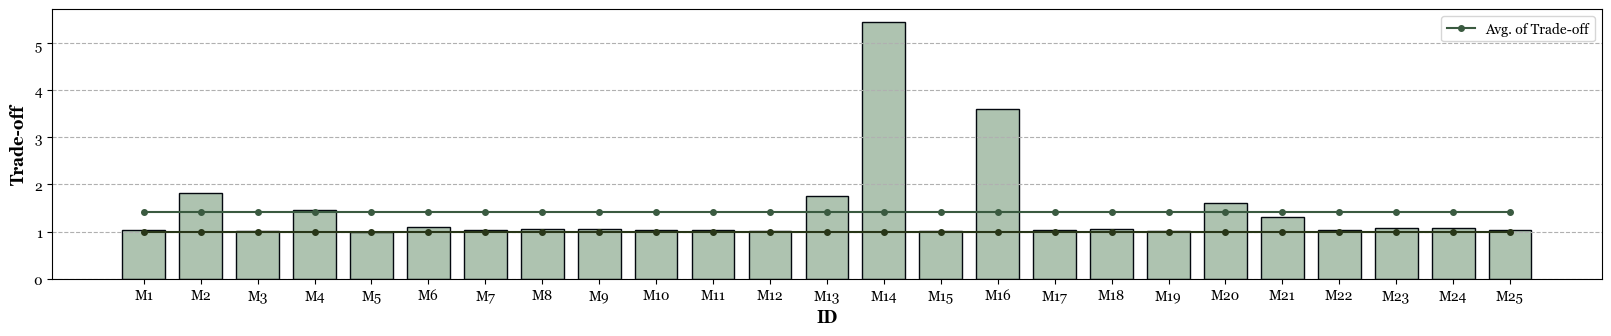

In [20]:
# RQ5: 10 runs VS. 300 runs: bar graph
run300_dir = 'rerun_data/ga_a0.5_ig'
run10_dir = 'RQ5_data/ga_a0.5_ig'
x = [f'M{i + 1}' for i in range(proj_num)]
y = []
y_fitness = []
for proj in proj_list:
    df300 = pd.read_csv(f'{run300_dir}/{proj}.csv')
    df10 = pd.read_csv(f'{run10_dir}/{proj}.csv')
    idx_df300 = get_best(run300_dir,
                         proj)
    idx_df10 = get_best(run10_dir,
                         proj)
    time_ratio = df10.loc[idx_df10, 'time_parallel']/df300.loc[idx_df300, 'time_parallel']
    price_ratio = df10.loc[idx_df10, 'price']/df300.loc[idx_df300, 'price']
    fitness_ratio = df10.loc[idx_df10, 'fitness']/df300.loc[idx_df300, 'fitness']
    y.append(time_ratio*price_ratio)
    y_fitness.append(fitness_ratio)

_, ax = plt.subplots(figsize=(20, 3.5))
bar_width = 0.75
ax.bar(x, y, color='#aec3b0', width=bar_width, edgecolor='#04080f')
# ax.plot(x, y_fitness, 'o-', color='#1b4332', markersize=4)
ax.plot(x, [1 for _ in range(proj_num)], 'o-', color='#283618', markersize=4)
ax.plot(x, [np.mean(y) for _ in range(proj_num)], 'o-', color='#3a5a40', markersize=4, label='Avg. of Trade-off')
ax.set_xlabel('ID', size=12, weight='bold')
ax.set_ylabel('Trade-off', size=12, weight='bold')
ax.yaxis.grid(True, linestyle='--', zorder=0)
ax.legend()
plt.savefig('RQ5.pdf', bbox_inches='tight', dpi=1000)
print(y)
print(np.mean(y))

In [10]:
# pareto
path = 'onerun_data/ga_a0.5_ig'
t = [f'M{i + 1}' for i in range(proj_num)]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

for i, proj in enumerate(proj_list):
    df = pd.read_csv(f'{path}/{proj}.csv')
    x = []
    y = []
    z = []
    for row in df.itertuples():
        x.append(row.time_parallel)
        y.append(row.price)
        z.append(row.probability_failure_rate)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c=colors)
    ax.set_xlabel('Running time')
    ax.set_ylabel('Price')
    ax.set_zlabel('Failrate')
    ax.set_title(f'{t[i]}')
    plt.savefig(f'pareto/{proj}.pdf', bbox_inches='tight', dpi=1000)
    plt.close()